<a href="https://colab.research.google.com/github/Hamshavarthini/Ziff-deep-learning/blob/master/nlpEDA_v1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Data retrieval

In [0]:
import requests
from bs4 import BeautifulSoup
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os

%matplotlib inline

In [0]:
url = 'https://inshorts.com/en/read/technology'

In [0]:
news_data = []

In [0]:
news_category = url.split('/')
news_category

['https:', '', 'inshorts.com', 'en', 'read', 'technology']

In [0]:
news_category = news_category[-1]

In [0]:
data = requests.get(url)
data.content

ProxyError: HTTPSConnectionPool(host='inshorts.com', port=443): Max retries exceeded with url: /en/read/technology (Caused by ProxyError('Cannot connect to proxy.', OSError('Tunnel connection failed: 407 Proxy Authentication Required',)))

In [0]:
soup = BeautifulSoup(data.content, 'html.parser')

In [0]:
news_articles = [{'news_headline': headline.find('span', attrs={'itemprop': 'headline'}).string,
                  'news_article': article.find('div', attrs={'itemprop': 'articleBody'}).string,
                  'news_category': news_category} 
                 for headline, article in zip(soup.find_all('div', 
                                                            class_ = ['news-card-title news-right-box']), 
                                              soup.find_all('div', class_=['news-card-content news-right-box']))]

In [0]:
news_data.extend(news_articles)
news_data

[{'news_article': 'Apple on Tuesday unveiled new iPad Pros that have no physical button, have larger screen options of 11 inch and 12.9 inch, and come with Face ID feature for unlocking. Apple has, for the first time, introduced USB-C port in the iPads. While the smaller 11-inch iPad Pro starts from $799, the larger 12.9-inch iPad Pro starts from $999.',
  'news_category': 'technology',
  'news_headline': 'Apple unveils new iPad Pros with Face ID, no physical button'},
 {'news_article': "Facebook-owned messaging app WhatsApp will begin showing advertisements in the 'Status' section of the app, the company has confirmed. The advertisements will be interlinked to the advertiser's profile on WhatsApp. Earlier, a Wall Street Journal report said that the advertisements on WhatsApp could be introduced early next year.",
  'news_category': 'technology',
  'news_headline': 'WhatsApp to start showing ads in Status, confirms company'},
 {'news_article': 'Apple on Tuesday unveiled new MacBook Air

In [0]:
df = pd.DataFrame(news_data)

In [0]:
df = df[['news_headline', 'news_article', 'news_category']]

In [0]:
df.head(3)

,news_headline,news_article,news_category
0,"Apple unveils new iPad Pros with Face ID, no p...",Apple on Tuesday unveiled new iPad Pros that h...,technology
1,"WhatsApp to start showing ads in Status, confi...",Facebook-owned messaging app WhatsApp will beg...,technology
2,Apple unveils new MacBook Air with Touch ID st...,Apple on Tuesday unveiled new MacBook Air lapt...,technology


# Prepare user defined function to extract data from inshorts.com

In [0]:
urls_list = ['https://inshorts.com/en/read/technology',
             'https://inshorts.com/en/read/sports',
             'https://inshorts.com/en/read/world']

In [0]:
def datasetPrepare(urls_list):
    news_data = []
    for url in urls_list:
        news_category = url.split('/')[-1]
        data = requests.get(url)
        soup = BeautifulSoup(data.content, 'html.parser')
        news_articles = [{'news_headline': headline.find('span', attrs={"itemprop": "headline"}).string,
                          'news_article': article.find('div', attrs={"itemprop": "articleBody"}).string,
                          'news_category': news_category}
                         
                            for headline, article in 
                             zip(soup.find_all('div', class_=["news-card-title news-right-box"]),
                                 soup.find_all('div', class_=["news-card-content news-right-box"]))
                        ]
        news_data.extend(news_articles) 
    df =  pd.DataFrame(news_data)
    df = df[['news_headline', 'news_article', 'news_category']]
    return df    

In [0]:
news_df = datasetPrepare(urls_list)

In [0]:
news_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 75 entries, 0 to 74
Data columns (total 3 columns):
news_headline    75 non-null object
news_article     75 non-null object
news_category    75 non-null object
dtypes: object(3)
memory usage: 1.8+ KB


In [0]:
news_df.head(5)

,news_headline,news_article,news_category
0,"Apple unveils new iPad Pros with Face ID, no p...",Apple on Tuesday unveiled new iPad Pros that h...,technology
1,"WhatsApp to start showing ads in Status, confi...",Facebook-owned messaging app WhatsApp will beg...,technology
2,Apple unveils new MacBook Air with Touch ID st...,Apple on Tuesday unveiled new MacBook Air lapt...,technology
3,IIT-Madras researchers design India's 1st micr...,Indian Institute of Technology Madras research...,technology
4,Inventor patents smartphone with 4 'notches' i...,An inventor named Lothar Pantel has patented a...,technology


In [0]:
news_df.news_category.value_counts()

technology    25
world         25
sports        25
Name: news_category, dtype: int64

# Text Wrangling and Pre-processing

In [0]:
import spacy
import nltk
from nltk.tokenize.toktok import ToktokTokenizer
import re
import unicodedata

In [0]:
from contractions import CONTRACTION_MAP

In [0]:
nlp = spacy.load('en')

In [0]:
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Narayana_GLB\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [0]:
tokenizer = ToktokTokenizer()
stopword_list = nltk.corpus.stopwords.words('english')
stopword_list.remove('no')
stopword_list.remove('not')

## Remove HTML tags

In [0]:
def strip_html_tags(text):
    soup = BeautifulSoup(text, "html.parser")
    stripped_text = soup.get_text()
    return stripped_text

strip_html_tags('<html><h2>Some important text</h2></html>')

'Some important text'

## Remove accented characters

In [0]:
def remove_accented_chars(text):
    text = unicodedata.normalize('NFKD', text).encode('ascii', 'ignore').decode('utf-8', 'ignore')
    return text

remove_accented_chars('Sómě Áccěntěd těxt')

'Some Accented text'

## Expand contractions

In [0]:
def expand_contractions(text, contraction_mapping=CONTRACTION_MAP):
    
    contractions_pattern = re.compile('({})'.format('|'.join(contraction_mapping.keys())), 
                                      flags=re.IGNORECASE|re.DOTALL)
    def expand_match(contraction):
        match = contraction.group(0)
        first_char = match[0]
        expanded_contraction = contraction_mapping.get(match)\
                                if contraction_mapping.get(match)\
                                else contraction_mapping.get(match.lower())                       
        expanded_contraction = first_char+expanded_contraction[1:]
        return expanded_contraction
        
    expanded_text = contractions_pattern.sub(expand_match, text)
    expanded_text = re.sub("'", "", expanded_text)
    return expanded_text

In [0]:
expand_contractions("Y'all can't expand contractions I'd think")

'You all cannot expand contractions I would think'

## Remove special characters

In [0]:
def remove_special_characters(text, remove_digits=False):
    pattern = r'[^a-zA-z0-9\s]' if not remove_digits else r'[^a-zA-z\s]'
    text = re.sub(pattern, '', text)
    return text

In [0]:
remove_special_characters("Well this was fun! What do you think? 123#@!", remove_digits=True)

'Well this was fun What do you think '

## Text lemmatization

In [0]:
def lemmatize_text(text):
    text = nlp(text)
    text = ' '.join([word.lemma_ if word.lemma_ != '-PRON-' else word.text for word in text])
    return text

In [0]:
lemmatize_text("My system keeps crashing! his crashed yesterday, ours crashes daily")

'My system keep crash ! his crashed yesterday , ours crash daily'

## Text stemming

In [0]:
def simple_stemmer(text):
    ps = nltk.porter.PorterStemmer()
    text = ' '.join([ps.stem(word) for word in text.split()])
    return text

simple_stemmer("My system keeps crashing his crashed yesterday, ours crashes daily")

'My system keep crash hi crash yesterday, our crash daili'

## Remove stopwords

In [0]:
def remove_stopwords(text, is_lower_case=False):
    tokens = tokenizer.tokenize(text)
    tokens = [token.strip() for token in tokens]
    if is_lower_case:
        filtered_tokens = [token for token in tokens if token not in stopword_list]
    else:
        filtered_tokens = [token for token in tokens if token.lower() not in stopword_list]
    filtered_text = ' '.join(filtered_tokens)    
    return filtered_text

remove_stopwords("The, and, if are stopwords, computer is not")

', , stopwords , computer not'

## Building a text normalizer

In [0]:
def normalize_corpus(corpus, html_stripping=True, contraction_expansion=True,
                     accented_char_removal=True, text_lower_case=True, 
                     text_lemmatization=True, special_char_removal=True, 
                     stopword_removal=True, remove_digits=True):
    
    normalized_corpus = []
    # normalize each document in the corpus
    for doc in corpus:
        # strip HTML
        if html_stripping:
            doc = strip_html_tags(doc)
        # remove accented characters
        if accented_char_removal:
            doc = remove_accented_chars(doc)
        # expand contractions    
        if contraction_expansion:
            doc = expand_contractions(doc)
        # lowercase the text    
        if text_lower_case:
            doc = doc.lower()
        # remove extra newlines
        doc = re.sub(r'[\r|\n|\r\n]+', ' ',doc)
        # lemmatize text
        if text_lemmatization:
            doc = lemmatize_text(doc)
        # remove special characters and\or digits    
        if special_char_removal:
            # insert spaces between special characters to isolate them    
            special_char_pattern = re.compile(r'([{.(-)!}])')
            doc = special_char_pattern.sub(" \\1 ", doc)
            doc = remove_special_characters(doc, remove_digits=remove_digits)  
        # remove extra whitespace
        doc = re.sub(' +', ' ', doc)
        # remove stopwords
        if stopword_removal:
            doc = remove_stopwords(doc, is_lower_case=text_lower_case)
            
        normalized_corpus.append(doc)
        
    return normalized_corpus

## Pre-process and normalize news articles

In [0]:
news_df['full_text'] = news_df["news_headline"].map(str)+ '. ' + news_df["news_article"]

In [0]:
news_df['clean_text'] = normalize_corpus(news_df['full_text'])
norm_corpus = list(news_df['clean_text'])
news_df.iloc[1][['full_text', 'clean_text']].to_dict()

{'clean_text': 'whatsapp start show ad status confirm company facebook messaging app whatsapp begin show advertisement status section app company confirm advertisement interlink advertiser profile whatsapp earlier wall street journal report say advertisement whatsapp could introduce early next year',
 'full_text': "WhatsApp to start showing ads in Status, confirms company. Facebook-owned messaging app WhatsApp will begin showing advertisements in the 'Status' section of the app, the company has confirmed. The advertisements will be interlinked to the advertiser's profile on WhatsApp. Earlier, a Wall Street Journal report said that the advertisements on WhatsApp could be introduced early next year."}

# Save the news articles

In [0]:
news_df.to_csv('news.csv', index=False, encoding='utf-8')

# Tagging Parts of Speech

In [0]:
news_df = pd.read_csv('news.csv')

In [0]:
corpus = normalize_corpus(news_df['full_text'], text_lower_case=False, 
                          text_lemmatization=False, special_char_removal=False)

sentence = str(news_df.iloc[1].news_headline)
sentence_nlp = nlp(sentence)

In [0]:
spacy_pos_tagged = [(word, word.tag_, word.pos_) for word in sentence_nlp]
pd.DataFrame(spacy_pos_tagged, columns=['Word', 'POS tag', 'Tag type'])

,Word,POS tag,Tag type
0,WhatsApp,NNP,PROPN
1,to,TO,PART
2,start,VB,VERB
3,showing,VBG,VERB
4,ads,NNS,NOUN
5,in,IN,ADP
6,Status,NNP,PROPN
7,",",",",PUNCT
8,confirms,VBZ,VERB
9,company,NN,NOUN


In [0]:
nltk.download('punkt')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Narayana_GLB\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [0]:
nltk.download('maxent_treebank_pos_tagger')

[nltk_data] Downloading package maxent_treebank_pos_tagger to
[nltk_data]     C:\Users\Narayana_GLB\AppData\Roaming\nltk_data...
[nltk_data]   Package maxent_treebank_pos_tagger is already up-to-
[nltk_data]       date!


True

In [0]:
nltk.download('averaged_perceptron_tagger')

[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     C:\Users\Narayana_GLB\AppData\Roaming\nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!


True

In [0]:
nltk_pos_tagged = nltk.pos_tag(sentence.split())

In [0]:
pd.DataFrame(nltk_pos_tagged, columns=['Word', 'POS tag'])

,Word,POS tag
0,WhatsApp,NNP
1,to,TO
2,start,VB
3,showing,VBG
4,ads,NNS
5,in,IN
6,"Status,",NNP
7,confirms,NNS
8,company,NN


# Shallow Parsing or Chunking Text

In [0]:
nltk.download('conll2000')

[nltk_data] Downloading package conll2000 to
[nltk_data]     C:\Users\Narayana_GLB\AppData\Roaming\nltk_data...
[nltk_data]   Package conll2000 is already up-to-date!


True

In [0]:
from nltk.corpus import conll2000
data = conll2000.chunked_sents()

In [0]:
train_data = data[:10900]
test_data = data[10900:] 
print(len(train_data), len(test_data))
print(train_data[1]) 

10900 48
(S
  Chancellor/NNP
  (PP of/IN)
  (NP the/DT Exchequer/NNP)
  (NP Nigel/NNP Lawson/NNP)
  (NP 's/POS restated/VBN commitment/NN)
  (PP to/TO)
  (NP a/DT firm/NN monetary/JJ policy/NN)
  (VP has/VBZ helped/VBN to/TO prevent/VB)
  (NP a/DT freefall/NN)
  (PP in/IN)
  (NP sterling/NN)
  (PP over/IN)
  (NP the/DT past/JJ week/NN)
  ./.)


# Named Entity Recognition

In [0]:
sentence = str(news_df.iloc[1].full_text)

In [0]:
sentence_nlp = nlp(sentence)

In [0]:
print([(word, word.ent_type_) for word in sentence_nlp if word.ent_type_])

[(WhatsApp, 'ORG'), (Status, 'ORG'), (Facebook, 'ORG'), (WhatsApp, 'ORG'), (Status, 'ORG'), (WhatsApp, 'ORG'), (Wall, 'ORG'), (Street, 'ORG'), (Journal, 'ORG'), (WhatsApp, 'ORG'), (early, 'DATE'), (next, 'DATE'), (year, 'DATE')]


In [0]:
from spacy import displacy
displacy.render(sentence_nlp, style='ent', jupyter=True)

In [0]:
named_entities = []
for sentence in corpus:
    temp_entity_name = ''
    temp_named_entity = None
    sentence = nlp(sentence)
    for word in sentence:
        term = word.text 
        tag = word.ent_type_
        if tag:
            temp_entity_name = ' '.join([temp_entity_name, term]).strip()
            temp_named_entity = (temp_entity_name, tag)
        else:
            if temp_named_entity:
                named_entities.append(temp_named_entity)
                temp_entity_name = ''
                temp_named_entity = None

entity_frame = pd.DataFrame(named_entities, 
                            columns=['Entity Name', 'Entity Type'])

In [0]:
top_entities = (entity_frame.groupby(by=['Entity Name', 'Entity Type'])
                           .size()
                           .sort_values(ascending=False)
                           .reset_index().rename(columns={0 : 'Frequency'}))
top_entities.T.iloc[:,:15]

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14
Entity Name,US,India,Indian,Iran,ODI,AI,Facebook,Saudi,Parliament,WhatsApp,Google,China,Yemen,Kashmir,second
Entity Type,GPE,GPE,NORP,GPE,ORG,GPE,ORG,NORP,ORG,ORG,ORG,GPE,GPE,LOC,ORDINAL
Frequency,31,16,8,7,7,6,6,6,5,5,5,5,5,5,5


In [0]:
top_entities = (entity_frame.groupby(by=['Entity Type'])
                           .size()
                           .sort_values(ascending=False)
                           .reset_index().rename(columns={0 : 'Frequency'}))
top_entities.T.iloc[:,:15]

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14
Entity Type,ORG,GPE,PERSON,DATE,CARDINAL,NORP,ORDINAL,MONEY,LOC,QUANTITY,TIME,PRODUCT,FAC,EVENT,PERCENT
Frequency,180,161,120,69,59,51,14,13,8,5,4,4,4,3,2


# Optional: Post reads for residency

## Emotion and Sentiment Analysis

In [0]:
from afinn import Afinn

In [0]:
af = Afinn()

In [0]:
sentiment_scores = [af.score(article) for article in corpus]

In [0]:
sentiment_category = ['positive' if score > 0 
                          else 'negative' if score < 0 
                              else 'neutral' 
                                  for score in sentiment_scores]

In [0]:
df = pd.DataFrame([list(news_df['news_category']), sentiment_scores, sentiment_category]).T

In [0]:
df.columns = ['news_category', 'sentiment_score', 'sentiment_category']

In [0]:
df['sentiment_score'] = df.sentiment_score.astype('float')

In [0]:
df.groupby(by=['news_category']).describe()

sentiment_score                                           
                        count  mean       std   min  25%  50%  75%   max
news_category                                                           
sports                   25.0 -0.24  5.994998 -16.0 -4.0  0.0  4.0  12.0
technology               25.0 -4.08  8.149233 -23.0 -8.0  0.0  1.0   6.0
world                    25.0 -3.92  6.082215 -17.0 -9.0 -4.0  0.0  10.0

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\categorical.py:490: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  box_data = remove_na(group_data[hue_mask])


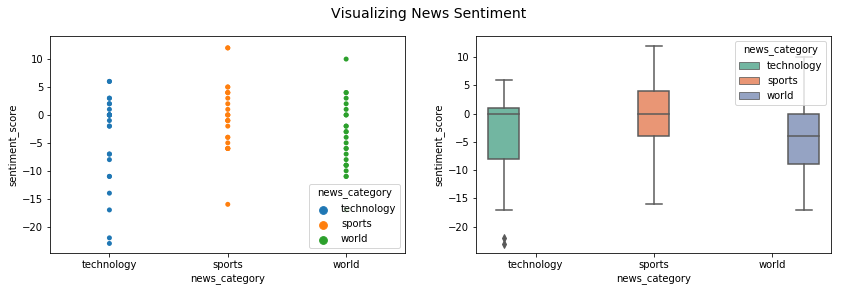

In [0]:
f, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 4))
sp = sns.stripplot(x='news_category', y="sentiment_score",  hue='news_category', data=df, ax=ax1)
bp = sns.boxplot(x='news_category', y="sentiment_score", hue='news_category', data=df, palette="Set2", ax=ax2)
t = f.suptitle('Visualizing News Sentiment', fontsize=14)

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\categorical.py:1508: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  stat_data = remove_na(group_data[hue_mask])


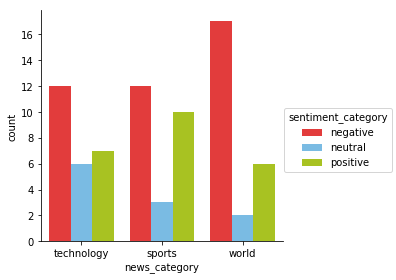

In [0]:
fc = sns.factorplot(x="news_category", hue="sentiment_category", 
                    data=df, kind="count", 
                    palette={"negative": "#FE2020", 
                             "positive": "#BADD07", 
                             "neutral": "#68BFF5"})

In [0]:
pos_idx = df[(df.news_category=='technology') & (df.sentiment_score == 2)].index[0]

In [0]:
neg_idx = df[(df.news_category=='technology') & (df.sentiment_score == -1)].index[0]

In [0]:
print('Most Negative Tech News Article:', news_df.iloc[neg_idx][['news_article']][0])
print()
print('Most Positive Tech News Article:', news_df.iloc[pos_idx][['news_article']][0])

Most Negative Tech News Article: Microsoft has denied reports claiming the company routinely shared Indian bank customers' financial details with the US intelligence agencies. "No government has direct access to any of our users' data. Data privacy is a top priority for us," a company spokesperson said. However, the company is required to share any customer data under orders from government agencies, the spokesperson added.

Most Positive Tech News Article: Apple on Tuesday unveiled new MacBook Air laptop with retina display and Touch ID for secure login, with a starting price of $1,199 (over ₹88,000). The starting model has 13.3-inch display, 8GB memory, 128GB SSD, is 15.6 mm thin and weighs 1.25 kg. It can be pre-ordered from today in the US and will be available from November 7.


In [0]:
pos_idx = df[(df.news_category=='world') & (df.sentiment_score == 3)].index[0]
neg_idx = df[(df.news_category=='world') & (df.sentiment_score == -6)].index[0]

print('Most Negative World News Article:', news_df.iloc[neg_idx][['news_article']][0])
print()
print('Most Positive World News Article:', news_df.iloc[pos_idx][['news_article']][0])

Most Negative World News Article: Paul Makonda, the Regional Commissioner of Tanzania's Dar es Salaam city, has asked the public to report the name of any person suspected of being gay. He also announced the creation of a special team that will identify gays on social media and arrest them. Homosexuality is illegal in Tanzania, carrying a minimum jail term of 30 years.

Most Positive World News Article: American rapper Kanye West has announced that he is distancing himself from politics, claiming that he has been "used" to spread messages he doesn't believe in.
His announcement came after he was linked to the 'Blexit' campaign that encourages black Americans to quit the Democratic Party. West has been a vocal supporter of US President Donald Trump.


In [0]:
from textblob import TextBlob

In [0]:
sentiment_scores_tb = [round(TextBlob(article).sentiment.polarity, 3) for article in news_df['clean_text']]

In [0]:
sentiment_category_tb = ['positive' if score > 0 
                             else 'negative' if score < 0 
                                 else 'neutral' 
                                     for score in sentiment_scores_tb]

In [0]:
df = pd.DataFrame([list(news_df['news_category']), sentiment_scores_tb, sentiment_category_tb]).T
df.columns = ['news_category', 'sentiment_score', 'sentiment_category']
df['sentiment_score'] = df.sentiment_score.astype('float')
df.groupby(by=['news_category']).describe()

sentiment_score                                                 \
                        count     mean       std    min    25%    50%    75%   
news_category                                                                  
sports                   25.0  0.10692  0.213254 -0.372  0.000  0.061  0.200   
technology               25.0  0.02672  0.214270 -0.300 -0.153  0.003  0.175   
world                    25.0 -0.00840  0.172726 -0.350 -0.062  0.000  0.067   

                     
                max  
news_category        
sports         0.75  
technology     0.40  
world          0.40

In [0]:
df.head()

,news_category,sentiment_score,sentiment_category
0,technology,0.088,positive
1,technology,0.033,positive
2,technology,0.112,positive
3,technology,0.175,positive
4,technology,0.400,positive


C:\ProgramData\Anaconda3\lib\site-packages\seaborn\categorical.py:1508: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  stat_data = remove_na(group_data[hue_mask])


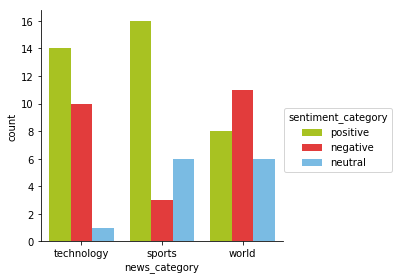

In [0]:
fc = sns.factorplot(x="news_category", hue="sentiment_category", 
                    data=df, kind="count", 
                    palette={"negative": "#FE2020", 
                             "positive": "#BADD07", 
                             "neutral": "#68BFF5"})

In [0]:
pos_idx = df[(df.news_category=='world') & (df.sentiment_score > 0.)].index[0]
neg_idx = df[(df.news_category=='world') & (df.sentiment_score < -0.)].index[0]

print('Most Negative World News Article:', news_df.iloc[neg_idx][['news_article']][0])
print()
print('Most Positive World News Article:', news_df.iloc[pos_idx][['news_article']][0])

Most Negative World News Article: American rapper Kanye West has announced that he is distancing himself from politics, claiming that he has been "used" to spread messages he doesn't believe in.
His announcement came after he was linked to the 'Blexit' campaign that encourages black Americans to quit the Democratic Party. West has been a vocal supporter of US President Donald Trump.

Most Positive World News Article: India's 30-year-old Meenakshi Moorthy, who died with her 29-year-old husband after falling 800 feet at America's Yosemite National Park, warned people against taking pictures on cliff edges in March on Instagram. "Standing at the edge of cliffs...can be fatal...Is our life just worth one photo?" Meenakshi wrote. The couple fell to death apparently while taking a selfie, her brother-in-law said.


In [0]:
import model_evaluation_utils as meu
meu.display_confusion_matrix_pretty(true_labels=sentiment_category, 
                                    predicted_labels=sentiment_category_tb, 
                                    classes=['negative', 'neutral', 'positive'])

Predicted:                 
                   negative neutral positive
Actual: negative         17       9       15
        neutral           2       2        7
        positive          5       2       16